In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-mri-dataset/Training/pituitary
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary
/kaggle/input/brain-tumor-mri-d

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import json

# Set the base directory for the dataset on your desktop
base_dir = os.path.expanduser('/kaggle/input/brain-tumor-mri-dataset')

# Define paths for training and testing directories
train_dir = os.path.join(base_dir, 'Training')
test_dir = os.path.join(base_dir, 'Testing')

2025-01-26 08:48:44.400944: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-26 08:48:44.401082: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-26 08:48:44.521774: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
# Define the image size in pixels and batch size
IMG_SIZE = (512, 512)  # Image size in pixels
BATCH_SIZE = 32

# Create ImageDataGenerator instances for training and testing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators to read images from the directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Print class indices for reference
print("Class indices:", train_generator.class_indices)

# Save the class indices for later use
with open('class_indices.json', 'w') as f:
    json.dump(train_generator.class_indices, f)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
Class indices: {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


In [4]:
def create_model(input_shape=(512, 512, 3), num_classes=4):
    model = tf.keras.models.Sequential()

    # First convolutional layer
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))

    # Second convolutional layer
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))

    # Third convolutional layer
    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))

    # Fourth convolutional layer
    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))

    # Flatten the output and add dense layers
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dropout(0.5))  # Adding dropout for regularization
    model.add(tf.keras.layers.Dense(512, activation='relu'))
    model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))  # Output layer with softmax activation for classification

    return model

# Create the model
input_shape = (512, 512, 3)  # Image size and number of channels (3 for RGB)
num_classes = 4  # Number of classes (no tumor, meningioma, pituitary tumor, glioma)
model = create_model(input_shape, num_classes)

# Print the model summary
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 510, 510, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 255, 255, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 253, 253, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 126, 126, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 124, 124, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 62, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 60, 60, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    58,982,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,225,796 (225.93 MB)

 Trainable params: 59,225,796 (225.93 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
!pip install -q -U keras-tuner

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [6]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras_tuner import HyperModel, Hyperband
import matplotlib.pyplot as plt

In [7]:
# Ensure GPU is being used
if tf.config.list_physical_devices('GPU'):
    print("GPU is available")
else:
    print("GPU is not available")

# Enable mixed precision training
tf.keras.mixed_precision.set_global_policy('mixed_float16')

GPU is available


In [8]:
# Define the batch size (Reduced to mitigate memory issues)
BATCH_SIZE = 16  # Adjust based on your dataset and available memory

# Define the data generators
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/brain-tumor-mri-dataset/Training',
    target_size=(512, 512),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

test_generator = train_datagen.flow_from_directory(
    '/kaggle/input/brain-tumor-mri-dataset/Testing',
    target_size=(512, 512),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 4571 images belonging to 4 classes.
Found 262 images belonging to 4 classes.


In [9]:
class MyHyperModel(HyperModel):
    def build(self, hp):
        base_model = VGG16(weights='imagenet', include_top=False, input_shape=(512, 512, 3))
        for layer in base_model.layers[-4:]:  # Unfreeze the last 4 layers
            layer.trainable = True

        x = base_model.output
        x = GlobalAveragePooling2D()(x)
        x = Dense(hp.Int('units', min_value=256, max_value=1024, step=256), activation='relu')(x)
        x = BatchNormalization()(x)
        x = Dropout(hp.Float('dropout', min_value=0.3, max_value=0.7, step=0.1))(x)
        predictions = Dense(train_generator.num_classes, activation='softmax')(x)

        model = Model(inputs=base_model.input, outputs=predictions)
        
        model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
        return model

In [10]:
# Initialize the Hyperband tuner
tuner = Hyperband(
    MyHyperModel(),
    objective='val_accuracy',
    max_epochs=10,
    directory='my_dir',
    project_name='hyperparam_tuning'
)

# Run the hyperparameter search
tuner.search(train_generator,
             steps_per_epoch=train_generator.samples // BATCH_SIZE,
             validation_data=test_generator,
             validation_steps=test_generator.samples // BATCH_SIZE,
             epochs=10)

Trial 30 Complete [00h 12m 06s]
val_accuracy: 0.40625

Best val_accuracy So Far: 0.69921875
Total elapsed time: 02h 31m 35s


In [11]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first dense layer is {best_hps.get('units')}, 
the optimal dropout rate is {best_hps.get('dropout')}, and the optimal learning rate is {best_hps.get('learning_rate')}.
""")


The hyperparameter search is complete. The optimal number of units in the first dense layer is 768, 
the optimal dropout rate is 0.4, and the optimal learning rate is 0.0001.



In [12]:
# Build the model with the optimal hyperparameters
model = tuner.hypermodel.build(best_hps)

# Define callbacks for learning rate reduction and early stopping
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-7, verbose=1)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

# Fine-tune the model
EPOCHS = 25
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=test_generator,
    validation_steps=test_generator.samples // BATCH_SIZE,
    callbacks=[reduce_lr, early_stopping]
)

Epoch 1/25
285/285 ━━━━━━━━━━━━━━━━━━━━ 152s 508ms/step - accuracy: 0.7228 - loss: 0.7080 - val_accuracy: 0.4531 - val_loss: 2.2696 - learning_rate: 1.0000e-04
Epoch 2/25
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5625 - loss: 0.8963 - val_accuracy: 0.1667 - val_loss: 36161.3047 - learning_rate: 1.0000e-04
Epoch 3/25
285/285 ━━━━━━━━━━━━━━━━━━━━ 142s 494ms/step - accuracy: 0.8525 - loss: 0.4075 - val_accuracy: 0.5742 - val_loss: 1.3643 - learning_rate: 1.0000e-04
Epoch 4/25
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 288us/step - accuracy: 0.9375 - loss: 0.3096 - val_accuracy: 0.0000e+00 - val_loss: 85726.6953 - learning_rate: 1.0000e-04
Epoch 5/25
285/285 ━━━━━━━━━━━━━━━━━━━━ 142s 494ms/step - accuracy: 0.8797 - loss: 0.3303 - val_accuracy: 0.7578 - val_loss: 0.6705 - learning_rate: 1.0000e-04
Epoch 6/25
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 289us/step - accuracy: 0.9375 - loss: 0.0709 - val_accuracy: 0.1667 - val_loss: 70232.8359 - learning_rate: 1.0000e-04
Epoch 7/25
285/285 ━━━━━━━━━━━━━

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 161ms/step - accuracy: 0.9399 - loss: 0.2236
Test accuracy after hyperparameter tuning: 0.91


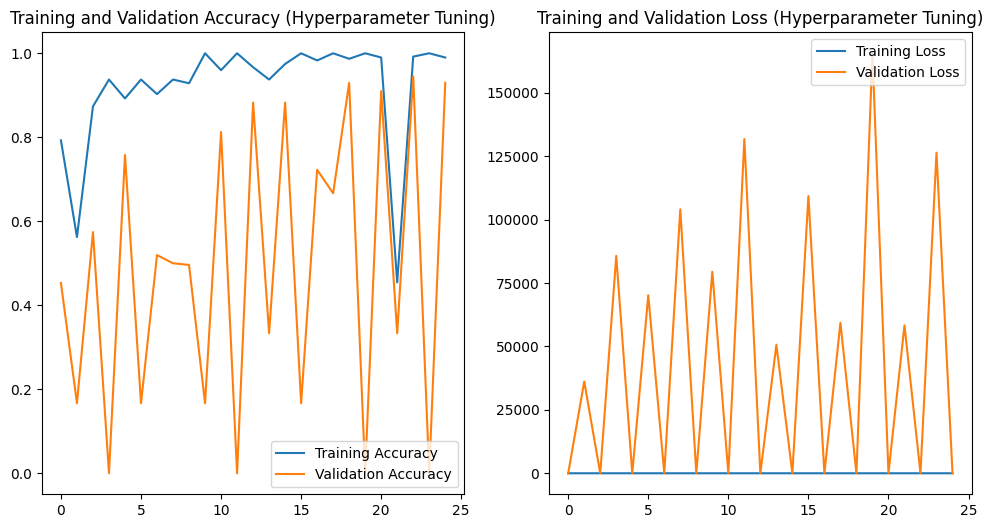

In [13]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // BATCH_SIZE)
print(f"Test accuracy after hyperparameter tuning: {test_accuracy:.2f}")

# Plot the training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy (Hyperparameter Tuning)')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss (Hyperparameter Tuning)')
plt.show()

In [14]:
# Save the trained model
model.save('fine_tuned_model.h5')

# Confirm that the model has been saved
print("Model saved as 'fine_tuned_model.h5'")


Model saved as 'fine_tuned_model.h5'


In [15]:
# Move the saved model to the output directory
!mv fine_tuned_model.h5 /kaggle/working/fine_tuned_model.h5

# Confirm that the model has been moved
print("Model moved to /kaggle/working/")


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


mv: 'fine_tuned_model.h5' and '/kaggle/working/fine_tuned_model.h5' are the same file
Model moved to /kaggle/working/
